# 6. Linear Regression with PyTorch
## 1. About Linear Regression


### 1.1 Simple Linear Regression Basics
- Allows us to understand **relationship** between two **continuous variables**
- Example
    - x: independent variable
        - weight
    - y: dependent variable
        - height
- $y = \alpha x + \beta$

### 1.2 Example of simple linear regression

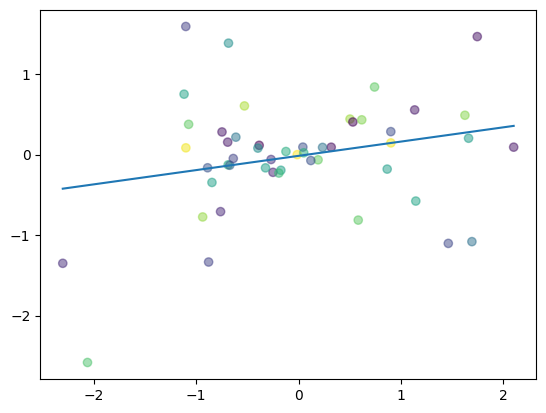

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

### 1.3 Aim of Linear Regression
- Minimize the distance between the points and the line ($y = \alpha x + \beta$)
- Adjusting
    - Coefficient: $\alpha$
    - Bias/intercept: $\beta$

## 2. Building a Linear Regression Model with PyTorch

### 2.1 Example
- Coefficient: $\alpha = 2$
- Bias/intercept: $\beta = 1$
- Equation: $y = 2x + 1$

### 2.2 Building a Toy Dataset

In [6]:
x_values = [i for i in range(11)]

In [7]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [9]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

$y = 2x + 1$

In [10]:
y_values = [2*i + 1 for i in x_values]

In [11]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [12]:
# In case you're weak in list iterators...
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result)

In [13]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [14]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [15]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

### 2.3 Building Model

**Critical Imports**

In [16]:
import torch
import torch.nn as nn

**Create Model**
1. Linear model
    - True Equation: $y = 2x + 1$
2. Forward
    - Example
        - Input $x = 1 $
        - Output $\hat y = ?$

In [17]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

**Instantiate Model Class**
- input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [18]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

**Instantiate Loss Class**
- MSE Loss: Mean Squared Error
- $MSE = \frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)$
    - $\hat y$: prediction
    - $y$: true value

In [19]:
criterion = nn.MSELoss()

**Instantiate Optimizer Class**
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
        - parameters: $\alpha$ and $\beta$ in $ y = \alpha x + \beta$
        - desired parameters: $\alpha = 2$ and $\beta = 1$ in $ y = 2x + 1$

In [20]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

**Train Model**
- 1 epoch: going through the whole x_train data once
    - 100 epochs:
        - 100x mapping `x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`
        
- Process
    1. Convert inputs/labels to tensors with gradients
    2. Clear gradient buffets
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [21]:
epochs = 500

In [22]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 194.55274963378906
epoch 2, loss 167.76365661621094
epoch 3, loss 123.91083526611328
epoch 4, loss 75.66699981689453
epoch 5, loss 34.691776275634766
epoch 6, loss 8.695771217346191
epoch 7, loss 0.11685001105070114
epoch 8, loss 6.454342842102051
epoch 9, loss 21.857072830200195
epoch 10, loss 39.30374526977539
epoch 11, loss 52.682247161865234
epoch 12, loss 58.233028411865234
epoch 13, loss 55.0927734375
epoch 14, loss 44.964378356933594
epoch 15, loss 31.167070388793945
epoch 16, loss 17.437305450439453
epoch 17, loss 6.847183704376221
epoch 18, loss 1.106004238128662
epoch 19, loss 0.3581537902355194
epoch 20, loss 3.436859369277954
epoch 21, loss 8.419449806213379
epoch 22, loss 13.278951644897461
epoch 23, loss 16.440080642700195
epoch 24, loss 17.109642028808594
epoch 25, loss 15.336197853088379
epoch 26, loss 11.834423065185547
epoch 27, loss 7.665753364562988
epoch 28, loss 3.8875315189361572
epoch 29, loss 1.2701538801193237
epoch 30, loss 0.14458391070365906
e

**Compare Data**

In [23]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.9653857],
       [ 2.9703705],
       [ 4.975355 ],
       [ 6.98034  ],
       [ 8.985325 ],
       [10.99031  ],
       [12.995295 ],
       [15.000279 ],
       [17.005264 ],
       [19.01025  ],
       [21.015234 ]], dtype=float32)

In [30]:
# y = 2x + 1
model.linear.


<generator object Module.parameters at 0x7a1760620200>

**Plot Graph**

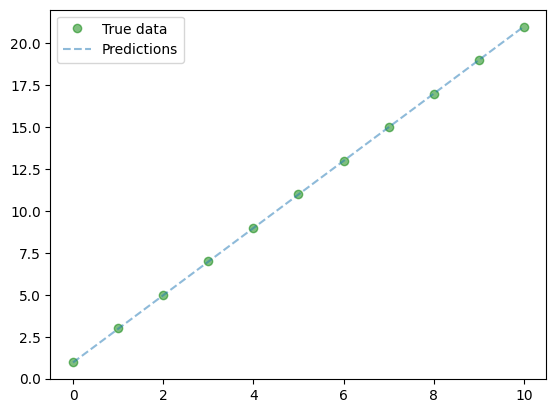

In [25]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

**Save Model**

In [26]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

**Load Model**

In [27]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

## 3. Building a Linear Regression Model with PyTorch (GPU)



**CPU Summary**

In [28]:
import torch
import torch.nn as nn

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

GPU: 2 things must be on GPU
- `model`
- `tensors with gradients`

In [29]:
import torch
import torch.nn as nn
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################



'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable

    #######################
    #  USE GPU FOR MODEL  #
    #######################
    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 108.198974609375
epoch 2, loss 9.568002700805664
epoch 3, loss 1.5146933794021606
epoch 4, loss 0.8496115207672119
epoch 5, loss 0.7872553467750549
epoch 6, loss 0.7741520404815674
epoch 7, loss 0.7651553750038147
epoch 8, loss 0.7565823197364807
epoch 9, loss 0.7481313943862915
epoch 10, loss 0.7397770285606384
epoch 11, loss 0.731515645980835
epoch 12, loss 0.7233471274375916
epoch 13, loss 0.7152696847915649
epoch 14, loss 0.7072821259498596
epoch 15, loss 0.6993840932846069
epoch 16, loss 0.6915745139122009
epoch 17, loss 0.6838511824607849
epoch 18, loss 0.6762151122093201
epoch 19, loss 0.6686636805534363
epoch 20, loss 0.6611968874931335
epoch 21, loss 0.6538134217262268
epoch 22, loss 0.6465120911598206
epoch 23, loss 0.6392930746078491
epoch 24, loss 0.6321542859077454
epoch 25, loss 0.6250948309898376
epoch 26, loss 0.6181142926216125
epoch 27, loss 0.6112123131752014
epoch 28, loss 0.6043868660926819
epoch 29, loss 0.5976375341415405
epoch 30, loss 0.5909641385

# Summary

- Simple **linear regression basics**
    - $y = Ax + B$
    - $y = 2x + 1$
- **Example** of simple linear regression
- **Aim** of linear regression
    - Minimizing distance between the points and the line
        - Calculate "distance" through `MSE`
        - Calculate `gradients`
        - Update parameters with `parameters = parameters - learning_rate * gradients`
        - Slowly update parameters $A$ and $B$ model the linear relationship between $y$ and $x$ of the form $y = 2x + 1$
- Built a linear regression **model** in **CPU and GPU**
    - Step 1: Create Model Class
    - Step 2: Instantiate Model Class
    - Step 3: Instantiate Loss Class
    - Step 4: Instantiate Optimizer Class
    - Step 5: Train Model
- Important things to be on **GPU**
    - `model`
    - `tensors with gradients`
- How to bring to **GPU**?
    - `model_name.cuda()`
    - `variable_name.cuda()`